<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [3]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
data=pd.read_csv("bike_sharing_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

Text(0.5, 1.0, 'Profit in $10000 vs City Population in 10000')

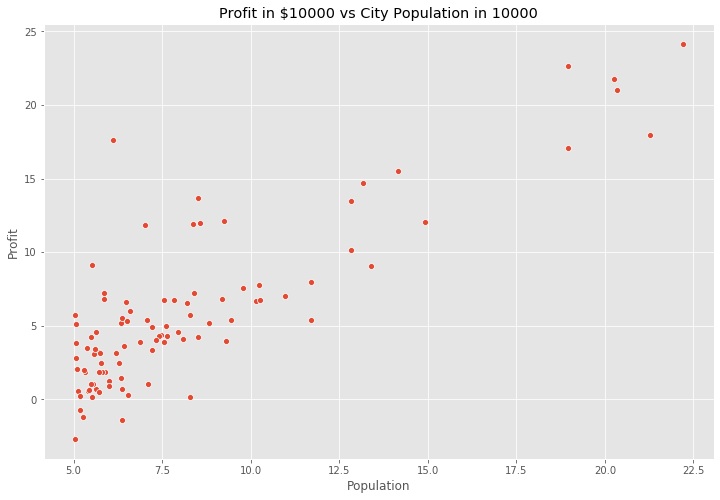

In [7]:
ax=sns.scatterplot(x="Population", y="Profit" ,data=data)
ax.set_title("Profit in $10000 vs City Population in 10000")

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [8]:
def cost_function(x,y,theta):
    m= len(y)
    y_pred=x.dot(theta)
    error=(y_pred-y)**2
    return 1/(2*m) *np.sum(error)

In [9]:
m=data.Population.values.size
x=np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis =1)
y=data.Profit.values.reshape(m,1)
theta=np.zeros((2,1))
#theta
cost_function(x,y,theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [10]:
def gradient_descent(x,y,theta,alpha, iterations):
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred=x.dot(theta)
        error=np.dot(x.transpose(),(y_pred-y))
        theta=theta - alpha*1/m *error
        costs.append(cost_function(x,y,theta))
    return theta,costs

In [11]:
theta,costs=gradient_descent(x,y,theta,alpha=0.01, iterations=2000)
print("h(x)={}+{}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x)=-3.79+1.18x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
theta_0 =np.linspace(-10,10,100)
theta_1=np.linspace(-1,4,100)
cost_values=np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i], theta_1[j]])
        cost_values[i,j]=cost_function(x,y,t)

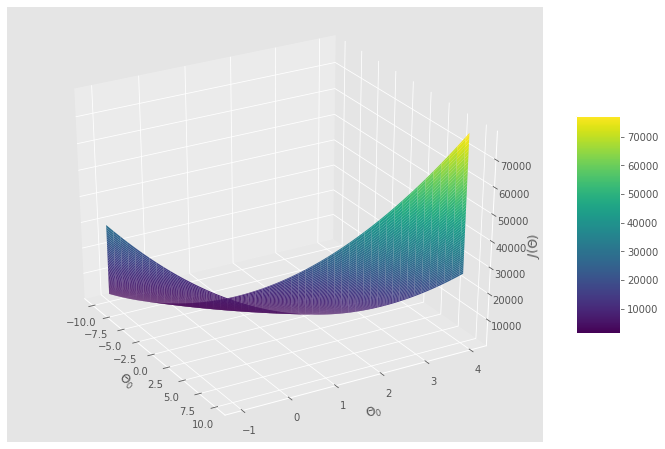

In [14]:
fig=plt.figure(figsize = (12,8))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(theta_0,theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_0$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)
plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

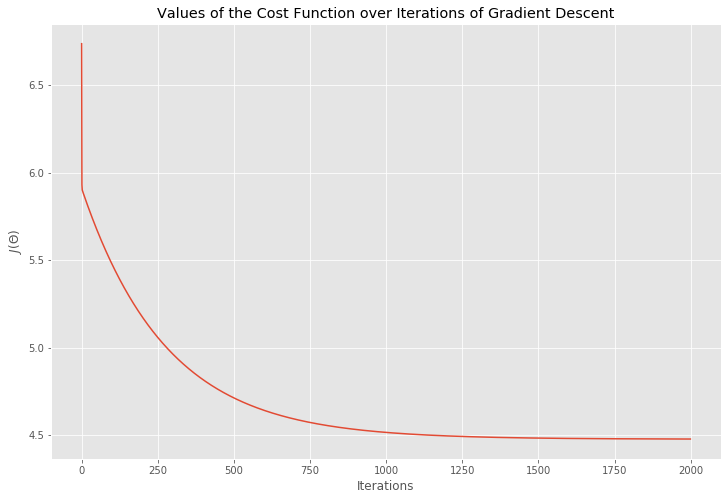

In [15]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent");

### Task 8: Training Data with Linear Regression Fit
---

In [16]:
theta.shape

(2, 1)

In [17]:
theta

array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'Linear Regression Fit')

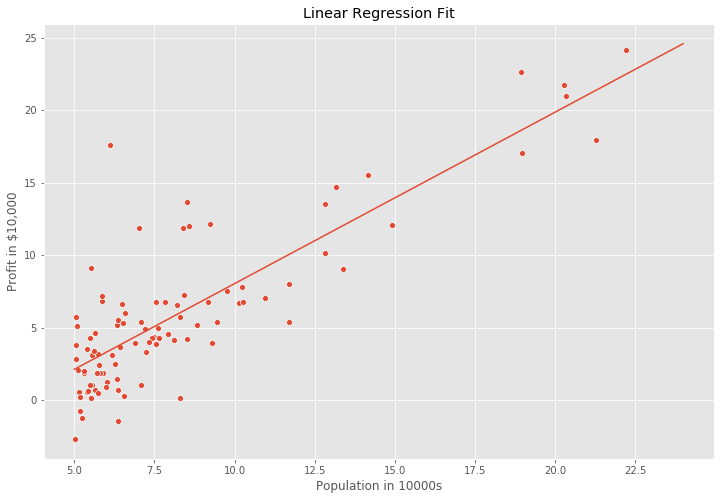

In [18]:
theta=np.squeeze(theta)
ax=sns.scatterplot(x="Population", y="Profit", data=data)
x_value= [x for x in range(5,25)]
y_value= [(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000")
plt.title("Linear Regression Fit")

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [19]:
def predict(x,theta):
    y_pred= np.dot(theta.transpose(),x)
    return y_pred

In [20]:
y_pred_1=predict(np.array([1,4]),theta)*10000
print("For a population of 40,000 people , the model predicts a profit of $"+str(round(y_pred_1,0)))

For a population of 40,000 people , the model predicts a profit of $9408.0


In [21]:
y_pred_2=predict(np.array([1,8.3]),theta)*10000
print("For a population of 83,000 people , the model predicts a profit of $"+str(round(y_pred_2,0)))

For a population of 83,000 people , the model predicts a profit of $60243.0


# Comparison with sklearn


In [22]:
from sklearn.linear_model import LinearRegression

In [29]:
X=data.Population.values.reshape(m,1)
reg = LinearRegression().fit(X, y)


In [28]:
reg.predict([[40000]])

array([[47717.44998671]])

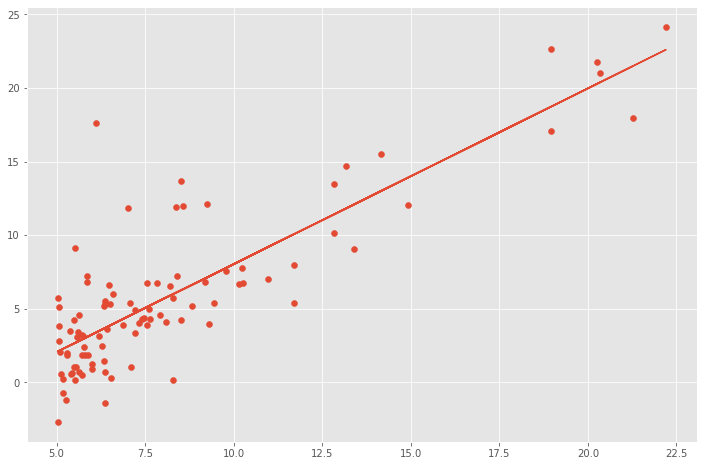

In [34]:
theta=np.squeeze(theta)
plt.scatter(x="Population", y="Profit", data=data)
plt.plot(X, reg.predict(X))
plt.show()

In [37]:
reg.coef_

array([[1.19303364]])